# TOI-469: Multiplanet system

## download data

In [1]:
import matplotlib.pyplot as plt

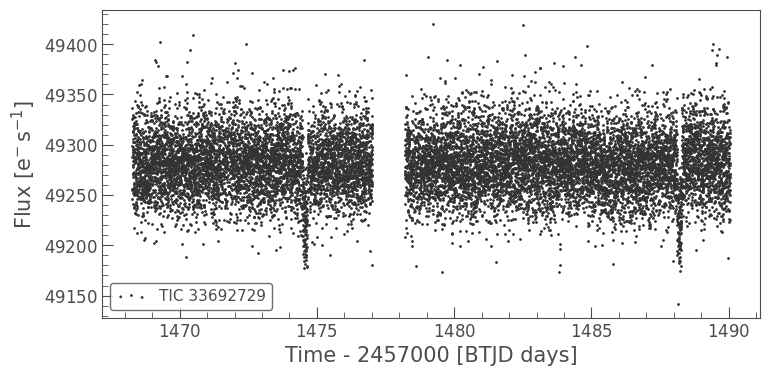

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1468.2765156441103,4.9298578e+04,2.6270775e+01,4.4497726e-03,173388,2045.16203,1433.74426,4.7041805e+04,2.4428167e+01,2.2512058e+03,6.0795965e+00,4.9298578e+04,2.6270775e+01,0,———,———,———,———,2045.16203,3.9099308e-04,1433.74426,4.1152441e-04,-3.1414698e-03,5.0656389e-02
1468.2779045547768,4.9336746e+04,2.6280182e+01,4.4497950e-03,173389,2045.15963,1433.74530,4.7089805e+04,2.4436914e+01,2.2547537e+03,6.0716462e+00,4.9336746e+04,2.6280182e+01,0,———,———,———,———,2045.15963,3.9057728e-04,1433.74530,4.1132391e-04,-7.5941146e-03,5.2372649e-02
1468.2792934649765,4.9287773e+04,2.6270000e+01,4.4498169e-03,173390,2045.16082,1433.74552,4.7034121e+04,2.4427448e+01,2.2429822e+03,6.0773330e+00,4.9287773e+04,2.6270000e+01,0,———,———,———,———,2045.16082,3.9182263e-04,1433.74552,4.1180980e-04,-6.0678064e-03,5.2114032e-02
1468.2806823756425,4.9245645e+04,2.6253189e+01,4.4498392e-03,173391,2045.16119,1433.74904,4.6980629e+04,2.4411816e+01,2.2556538e+03,6.0712709e+00,4.9245645e+04,2.6253189e+01,0,———,———,———,———,2045.16119,3.9197798e-04,1433.74904,4.1175954e-04,-4.5641898e-03,5.6188624e-02
1468.2820712858434,4.9254703e+04,2.6265699e+01,4.4498611e-03,173392,2045.15835,1433.74381,4.7005977e+04,2.4423447e+01,2.2471138e+03,6.0799923e+00,4.9254703e+04,2.6265699e+01,0,———,———,———,———,2045.15835,3.9125531e-04,1433.74381,4.1201577e-04,-9.0965033e-03,5.0934661e-02


In [2]:
import lightkurve as lk
lc = lk.search_lightcurve("HIP 29442",author="SPOC",sector=6).download("hardest")
fig = lc.scatter()
plt.show()
lc.head()

In [20]:
t,f,e = lc["time"].value, lc["flux"].value.unmasked,lc["flux_err"].value.unmasked
medf  = np.median(f)
f /= medf
e /= medf
np.savetxt("TOI469_S06.dat",np.stack((t,f,e),axis=1),fmt='%.8f')

## CONAN Analysis

In [8]:
from glob import glob
from os.path import basename

import numpy as np
import CONAN3
import matplotlib.pyplot as plt
import pandas as pd
print(f"CONAN version: {CONAN3.__version__}")

CONAN version: 3.1.0


# Analysis 

   - Transit Photometry: 2 sectors of TESS
   - RV: ESPRESSO

## Setup light curve object

In [9]:
path = "data/"
lc_list  = ["TOI469_S06.dat","TOI469_S33.dat"]

In [10]:
df = pd.read_fwf(path+lc_list[0], names=[f"col{i}" for i in range(9)])
df.head(5)

,col0,col1,col2,col3,col4,col5,col6,col7,col8
0,1468.276516,1.000369,0.000533,1.0,1.0,1.0,1.0,1.0,1.0
1,1468.277905,1.001143,0.000533,1.0,1.0,1.0,1.0,1.0,1.0
2,1468.279293,1.000149,0.000533,1.0,1.0,1.0,1.0,1.0,1.0
3,1468.280682,0.999294,0.000533,1.0,1.0,1.0,1.0,1.0,1.0
4,1468.282071,0.999478,0.000533,1.0,1.0,1.0,1.0,1.0,1.0


### load light curve into CONAN

In [7]:
lc_obj = CONAN3.load_lightcurves(file_list     = lc_list, 
                                  data_filepath = path, 
                                  filters       = ["T"], 
                                  lamdas        = [0.8],
                                  nplanet=3)
lc_obj

# ============ Input lightcurves, filters baseline function =======================================================
name           filt 𝜆_𝜇m |s_samp  clip    scl_col |col0 col3 col4 col5 col6 col7|sin id GP spline_config  
TOI469_S06.dat T    800  |None    None    None    |   0    0    0    0    0    0|  0  1 n  None           
TOI469_S33.dat T    800  |None    None    None    |   0    0    0    0    0    0|  0  2 n  None           


lightcurves from filepath: data/
3 transiting planet(s)
Order of unique filters: ['T']

- The lc_obj object holds information now about the light curves. The light curves can be plotted using the `plot` method of the object.

By default this plots column 0 (time) against column 1 (flux) with column 3(flux err) as uncertainties. 

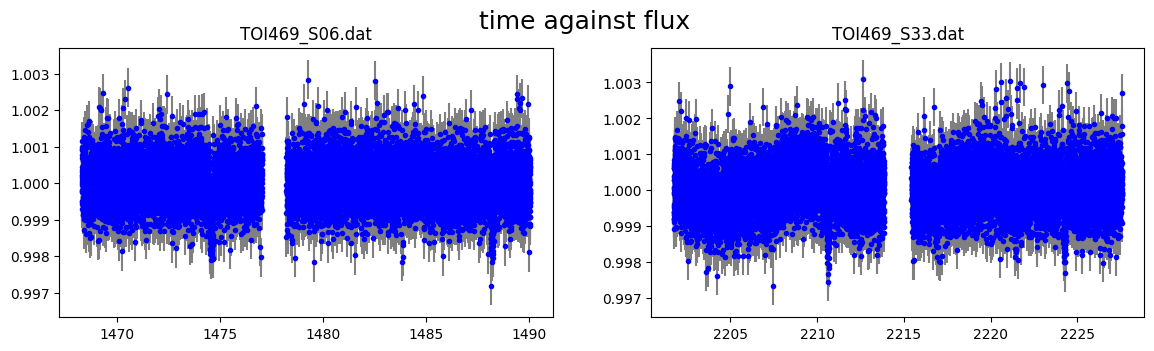

In [8]:
lc_obj.plot()


TOI469_S06.dat: Rejected 81 points more than 4.0 x MAD from the median


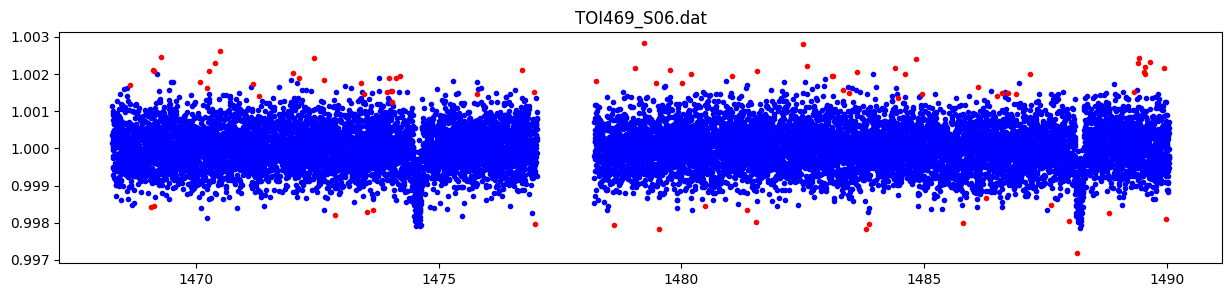


TOI469_S33.dat: Rejected 111 points more than 4.0 x MAD from the median


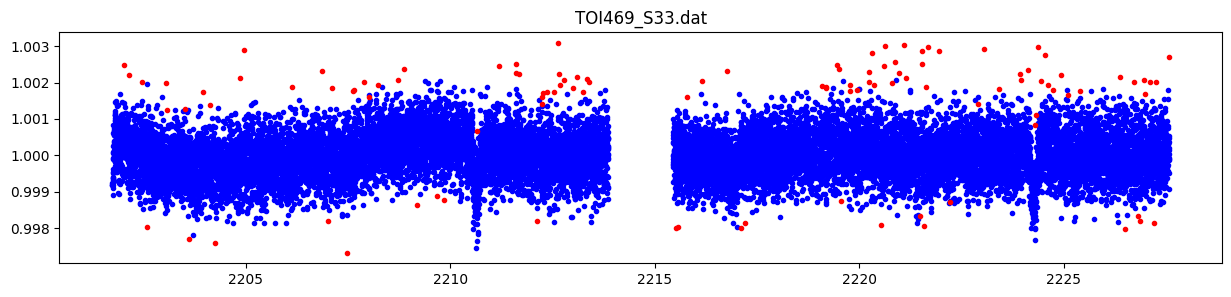

In [9]:
lc_obj.clip_outliers(clip=4, width=15)

### Planet parameters

In [10]:
traocc_pars =dict( T_0            = [(2210.634,0.1), (2207.252,0.1), (2225.259,0.1)],
                    Period        = [(13.63083,3e-4),(3.53796,3e-4), (6.42975,3e-4)],
                    Impact_para   = [(0, 0.28, 1), (0, 0.617,1), (0,0.273,1)],
                    RpRs          = [(0.001,0.0321,0.1), (0.001,0.0146,0.1), (0.001,0.0127,0.1)],
                    rho_star      = (1.42,0.1),
                    K             = (0,2,20)     #m/s
                  )


In [11]:
lc_obj.planet_parameters(**traocc_pars)

# ============ Planet parameters (Transit and RV) setup ========================================================== 
name        	fit	prior
rho_star    	y  	N(1.42,0.1)
------------
RpRs_1      	y  	U(0.001,0.0321,0.1)
Impact_para_1	y  	U(0,0.28,1)
T_0_1       	y  	N(2210.634,0.1)
Period_1    	y  	N(13.63083,0.0003)
Eccentricity_1	n  	F(0)
omega_1     	n  	F(90)
K_1         	y  	U(0,2,20)
------------
RpRs_2      	y  	U(0.001,0.0146,0.1)
Impact_para_2	y  	U(0,0.617,1)
T_0_2       	y  	N(2207.252,0.1)
Period_2    	y  	N(3.53796,0.0003)
Eccentricity_2	n  	F(0)
omega_2     	n  	F(90)
K_2         	y  	U(0,2,20)
------------
RpRs_3      	y  	U(0.001,0.0127,0.1)
Impact_para_3	y  	U(0,0.273,1)
T_0_3       	y  	N(2225.259,0.1)
Period_3    	y  	N(6.42975,0.0003)
Eccentricity_3	n  	F(0)
omega_3     	n  	F(90)
K_3         	y  	U(0,2,20)


### limb darkening

In [12]:
q1,q2 = lc_obj.get_LDs(Teff=(5289,69),
                       logg=(4.24,0.13),
                       Z=(0.24,0.05),
                       filter_names=["TESS"], use_result=True)

TESS      (T): q1=(0.3535, 0.0173), q2=(0.4026, 0.0132)

Setting-up limb-darkening priors from LDTk result
# ============ Limb darkening setup ============================================================================= 
filters	fit	q_1              	q_2              
T      	y  	N(0.3535,0.0173) 	N(0.4026,0.0132) 


- manually define baseline for each lc - just a GP 

In [14]:
lc_obj.lc_baseline(gp = "ce")

# ============ Input lightcurves, filters baseline function =======================================================
name           filt 𝜆_𝜇m |s_samp  clip    scl_col |col0 col3 col4 col5 col6 col7|sin id GP spline_config  
TOI469_S06.dat T    800  |None    W15C4   None    |   0    0    0    0    0    0|  0  1 ce None           
TOI469_S33.dat T    800  |None    W15C4   None    |   0    0    0    0    0    0|  0  2 ce None           


### add GP

In [15]:
#estimate rms of each light curve to use as starting point of gp amplitude
for nm in lc_obj._names:
    rms = np.std(np.diff(lc_obj._input_lc[nm]["col1"]))/np.sqrt(2)*1e6
    print(f"{rms = :.2f} ppm")

rms = 547.99 ppm
rms = 567.63 ppm


In [16]:
lc_obj.add_GP(lc_list     = "all",
              par         = ["col0","col0"],
              kernel      = "mat32",
              amplitude   = (20,600, 5000),    #in ppm, uses log-uniform prior    
              lengthscale = (0.007,1, 30),    #in days, also log-uniform prior
             )

# ==================== Photometry GP properties ==================================================================
name           par1 kern1 Amplitude1_ppm     length_scale      |op| par2 kern2 Amplitude2_ppm     length_scale2    
TOI469_S06.dat col0 mat32 LU(20,600,5000)    LU(0.007,1,30)    |--| None None  None               None              
TOI469_S33.dat col0 mat32 LU(20,600,5000)    LU(0.007,1,30)    |--| None None  None               None              


## Setup RV

In [17]:
import CONAN3
import matplotlib.pyplot as plt
path = "data/"


In [18]:
rv_list = ["TOI469rv1.dat", "TOI469rv2.dat" ]
rv_obj = CONAN3.load_rvs(file_list     = rv_list, 
                         data_filepath = path,
                         nplanet       = 3,
                         rv_unit       = "m/s"
                        )
rv_obj

# ============ Input RV curves, baseline function, GP, spline,  gamma ============================================ 
name          scl_col |col0 col3 col4 col5| sin GP spline_config   | gamma_m/s
TOI469rv1.dat None    |   0    0    0    0|   0 n  None            | F(0.0) 
TOI469rv2.dat None    |   0    0    0    0|   0 n  None            | F(0.0) 


rvs from filepath: data/
3 planet(s)

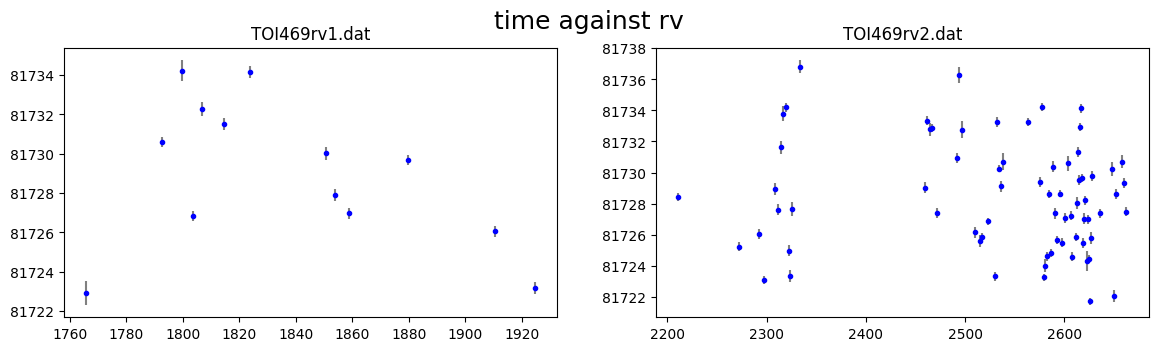

In [19]:
rv_obj.plot()

In [20]:
rv_obj.rv_baseline(gamma = (81728,10), gam_steps=1, gp="y")

# ============ Input RV curves, baseline function, GP, spline,  gamma ============================================ 
name          scl_col |col0 col3 col4 col5| sin GP spline_config   | gamma_m/s
TOI469rv1.dat None    |   0    0    0    0|   0 y  None            | N(81728,10) 
TOI469rv2.dat None    |   0    0    0    0|   0 y  None            | N(81728,10) 


In [21]:
rv_obj.add_rvGP(rv_list   = 'same',
              par         = [("col0",        "col0")],
              kernel      = [("cos",         "expsq")],
              amplitude   = [((0.1, 2, 20),    (1,10, 20))],    #in same unit as rv, uses log-uniform prior    
              lengthscale = [((0.01,1, 100), (0.01,1, 60))],    #in days, also log-uniform prior
              operation  = ["+"]    
             )

# ==================== RV GP properties ========================================================================== 
name          par1 kern1 Amplitude1         length_scale      |op| par2 kern2 Amplitude2         length_scale2  
same          col0 cos   LU(0.1,2,20)       LU(0.01,1,100)    |+ | col0 expsq LU(1,10,20)        LU(0.01,1,60)   


## Setup Sampling

In [22]:
fit_obj = CONAN3.fit_setup( R_st = (0.993,0.034),
                            M_st = (0.88,0.035),
                            apply_LCjitter="y",apply_RVjitter="y",
                            LCjitter_loglims=[-15, -4], RVjitter_lims=[0,3]  )

# ============ Stellar input properties ======================================================================
# parameter     value 
Radius_[Rsun]  N(0.993,0.034)
Mass_[Msun]    N(0.880,0.035)
Input_method:[R+rho(Rrho), M+rho(Mrho)]: Rrho


In [23]:
fit_obj.sampling(sampler="emcee",n_cpus = 10, n_chains=64,
                 n_steps=5000, n_burn=5000)

# ============ FIT setup =====================================================================================
Number_steps                       5000 
Number_chains                      64 
Number_of_processes                10 
Burnin_length                      5000 
n_live                             300 
force_nlive                        False 
d_logz                             0.1 
Sampler[emcee/dynesty]             emcee 
emcee_move[stretch/demc/snooker]   stretch 
leastsq_for_basepar                n 
apply_LCjitter                     y 
apply_RVjitter                     y 
LCjitter_loglims                   [-15, -4] 
RVjitter_lims                      [0, 3] 
LCbasecoeff_lims                   [-1, 1] 
RVbasecoeff_lims                   [-5, 5] 


## Export configuration

In [24]:
CONAN3.create_configfile(lc_obj, rv_obj, fit_obj,
                         filename='TOI469_lc_rvconfig.dat')

configuration file saved as TOI469_lc_rvconfig.dat


The config file can be reloaded to create all required objects to perform the fit

In [ ]:
import CONAN3
lc_obj, rv_obj, fit_obj = CONAN3.load_configfile('TOI469_lc_rvconfig.dat')

## Performing the fit

finally perform the fitting which is saved to a `results` object that holds the chains of the mcmc and allows subsequent plotting

In [50]:
result = CONAN3.run_fit(lc_obj,rv_obj, fit_obj, 
                        out_folder="result_TOI469_multi_dynesty", 
                        rerun_result=True);

Fit result already exists in this folder: result_TOI469_multi_dynesty.
Rerunning with results to generate plots and files...

CONAN fit launched!!!

Setting up photometry arrays ...
Setting up photometry GPs ...
Setting up RV arrays ...
Plotting prior distributions

Plotting initial guess
---------------------------

============ Samping started ... (using dynesty)======================
No of dimensions:  34

Skipping dynesty run. Loading chains from disk

Dynesty chain written to disk as result_TOI469_multi_dynesty/chains_dict.pkl. Run `result=CONAN3.load_result()` to load it.

============ Sampling Finished ==============================================



saved 2 corner plots as result_TOI469_multi_dynesty/corner_*.png

Plotting output figures
LC1 ...Writing LC output with GP(Celerite) to file: result_TOI469_multi_dynesty/TOI469_S06_lcout.dat
LC2 ...Writing LC output with GP(Celerite) to file: result_TOI469_multi_dynesty/TOI469_S33_lcout.dat
RV1 ...Writing RV output with GPGeorge to file: result_TOI469_multi_dynesty/TOI469rv1_rvout.dat
RV2 ...Writing RV output with GPGeorge to file: result_TOI469_multi_dynesty/TOI469rv2_rvout.dat


['lc'] Output files, ['TOI469_S06_lcout.dat', 'TOI469_S33_lcout.dat'], loaded into result object
['rv'] Output files, ['TOI469rv1_rvout.dat', 'TOI469rv2_rvout.dat'], loaded into result object


Object containing posterior from emcee/dynesty sampling                 
Parameters in chain are:
	 ['rho_star', 'T_0_1', 'RpRs_1', 'Impact_para_1', 'Period_1', 'K_1', 'T_0_2', 'RpRs_2', 'Impact_para_2', 'Period_2', 'K_2', 'T_0_3', 'RpRs_3', 'Impact_para_3', 'Period_3', 'K_3', 'T_q1', 'T_q2', 'lc1_logjitter', 'lc2_logjitter', 'rv1_gamma', 'rv1_jitter', 'rv2_gamma', 'rv2_jitter', 'lc1_off', 'lc2_off', 'GPlc1_Amp0_col0', 'GPlc1_len0_col0', 'GPlc2_Amp0_col0', 'GPlc2_len0_col0', 'GPrvSame_Amp0_col0', 'GPrvSame_len0_col0', 'GPrvSame_Amp1_col0', 'GPrvSame_len1_col0']                 

use `plot_chains()`, `plot_burnin_chains()`, `plot_corner()` or `plot_posterior()` methods on selected parameters to visualize results.

# Results

In [1]:
import CONAN3
from CONAN3.utils import bin_data, phase_fold
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
result =CONAN3.load_result("result_TOI469_multi_dynesty")
result

['lc'] Output files, ['TOI469_S06_lcout.dat', 'TOI469_S33_lcout.dat'], loaded into result object
['rv'] Output files, ['TOI469rv1_rvout.dat', 'TOI469rv2_rvout.dat'], loaded into result object


Object containing posterior from emcee/dynesty sampling                 
Parameters in chain are:
	 ['rho_star', 'T_0_1', 'RpRs_1', 'Impact_para_1', 'Period_1', 'K_1', 'T_0_2', 'RpRs_2', 'Impact_para_2', 'Period_2', 'K_2', 'T_0_3', 'RpRs_3', 'Impact_para_3', 'Period_3', 'K_3', 'T_q1', 'T_q2', 'lc1_logjitter', 'lc2_logjitter', 'rv1_gamma', 'rv1_jitter', 'rv2_gamma', 'rv2_jitter', 'lc1_off', 'lc2_off', 'GPlc1_Amp0_col0', 'GPlc1_len0_col0', 'GPlc2_Amp0_col0', 'GPlc2_len0_col0', 'GPrvSame_Amp0_col0', 'GPrvSame_len0_col0', 'GPrvSame_Amp1_col0', 'GPrvSame_len1_col0']                 

use `plot_chains()`, `plot_burnin_chains()`, `plot_corner()` or `plot_posterior()` methods on selected parameters to visualize results.

In [3]:
result.plot_chains(['Period_1','Period_2','Period_3'],figsize=(7,4));

chains are not available for dynesty sampler


## LC

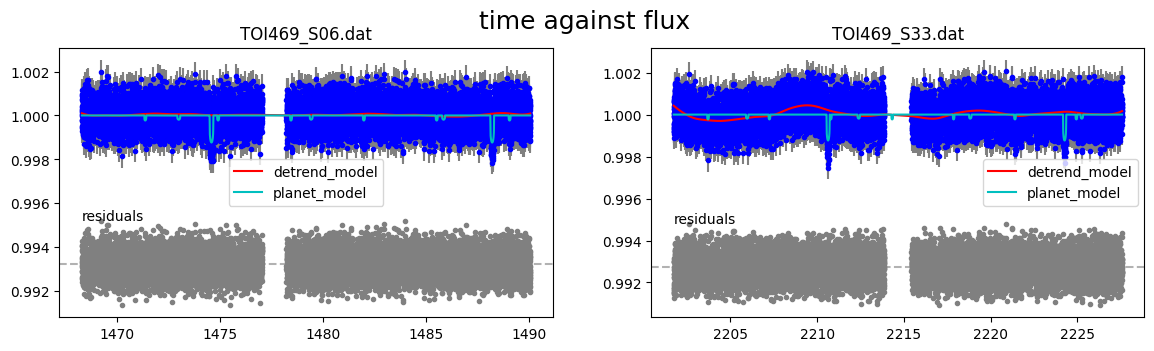

In [4]:
fig = result.lc.plot_bestfit()

In [5]:
result.lc.names

['TOI469_S06.dat', 'TOI469_S33.dat']

In [6]:
#load output data files for the lc fits
lc1data = result.lc.outdata['TOI469_S06.dat']
lc2data = result.lc.outdata['TOI469_S33.dat']

lc1data.head()

,time,flux,error,full_mod,gp*base,transit,det_flux,spl_fit,phase_1,phase_2,phase_3
0,1468.276516,1.000369,0.000533,1.000100,1.000100,1.0,1.000269,1.0,-0.461636,0.130116,0.268499
1,1468.277905,1.001143,0.000533,1.000099,1.000099,1.0,1.001044,1.0,-0.461534,0.130508,0.268715
2,1468.279293,1.000149,0.000533,1.000099,1.000099,1.0,1.000051,1.0,-0.461432,0.130901,0.268931
3,1468.280682,0.999294,0.000533,1.000098,1.000098,1.0,0.999196,1.0,-0.461330,0.131293,0.269147
4,1468.282071,0.999478,0.000533,1.000098,1.000098,1.0,0.999381,1.0,-0.461228,0.131686,0.269363


In [8]:
#join two outputs in a single dataframe (so we can plot the model across the times)
lcdata = pd.concat([lc1data,lc2data])
lcdata

,time,flux,error,full_mod,gp*base,transit,det_flux,spl_fit,phase_1,phase_2,phase_3
0,1468.276516,1.000369,0.000533,1.000100,1.000100,1.0,1.000269,1.0,-0.461636,0.130116,0.268499
1,1468.277905,1.001143,0.000533,1.000099,1.000099,1.0,1.001044,1.0,-0.461534,0.130508,0.268715
2,1468.279293,1.000149,0.000533,1.000099,1.000099,1.0,1.000051,1.0,-0.461432,0.130901,0.268931
3,1468.280682,0.999294,0.000533,1.000098,1.000098,1.0,0.999196,1.0,-0.461330,0.131293,0.269147
4,1468.282071,0.999478,0.000533,1.000098,1.000098,1.0,0.999381,1.0,-0.461228,0.131686,0.269363
...,...,...,...,...,...,...,...,...,...,...,...
17342,2227.569050,0.999922,0.000532,1.000163,1.000163,1.0,0.999759,1.0,0.242409,-0.257468,0.359542
17343,2227.571828,0.999871,0.000532,1.000164,1.000164,1.0,0.999707,1.0,0.242613,-0.256683,0.359974
17344,2227.573216,1.000204,0.000532,1.000165,1.000165,1.0,1.000040,1.0,0.242715,-0.256291,0.360190
17345,2227.574605,0.999079,0.000532,1.000165,1.000165,1.0,0.998914,1.0,0.242817,-0.255898,0.360406


In [9]:
# evaluate the transit model across both datasets and get individual planet's transit model
lcmod = result.lc.evaluate(file='TOI469_S06.dat',time=np.array(lcdata["time"]), 
                               return_std=True,nsamp=100)

In [10]:
lcmod.__dict__.keys()

dict_keys(['planet_model', 'components', 'sigma_low', 'sigma_high'])

### Individual components

In [11]:
lc_comp = lcmod.components
lc_comp.keys()

dict_keys(['pl_1', 'pl_2', 'pl_3'])

##### planet 1

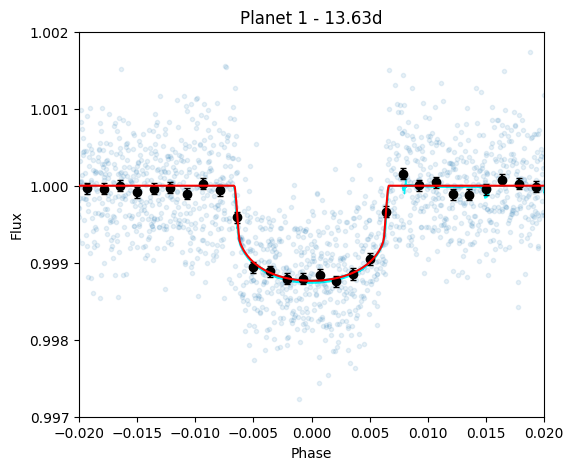

In [27]:
srt = np.argsort(lcdata["phase_1"])
subtract_signal = (lc_comp["pl_2"]-1) + (lc_comp["pl_3"]-1)
lc_pl1 = (lcdata["det_flux"]-subtract_signal)

plt.figure(figsize=(6,5))
plt.title(f"Planet 1 - {result.params_dict['Period_1']:.2f}d")

plt.plot(lcdata["phase_1"], lc_pl1,".",alpha=0.1)

ph_bin, f_bin, e_bin = bin_data(t = np.array(lcdata["phase_1"])[srt], 
                                f = np.array(lc_pl1)[srt], 
                               err= np.array(lcdata["error"])[srt],
                                bins = 700)
plt.errorbar(ph_bin, f_bin, e_bin, fmt="ko",capsize=2)

plt.plot(np.array(lcdata["phase_1"])[srt], lc_comp["pl_1"][srt],"r",zorder=3)

plt.fill_between(np.array(lcdata["phase_1"])[srt],
                 (lcmod.sigma_low - subtract_signal)[srt], 
                 (lcmod.sigma_high - subtract_signal)[srt], color="cyan")


plt.ylim([0.997,1.002])
plt.xlim([-0.02,0.02])
plt.ylabel("Flux")
plt.xlabel("Phase");


##### planet 2

Text(0.5, 0, 'Phase')

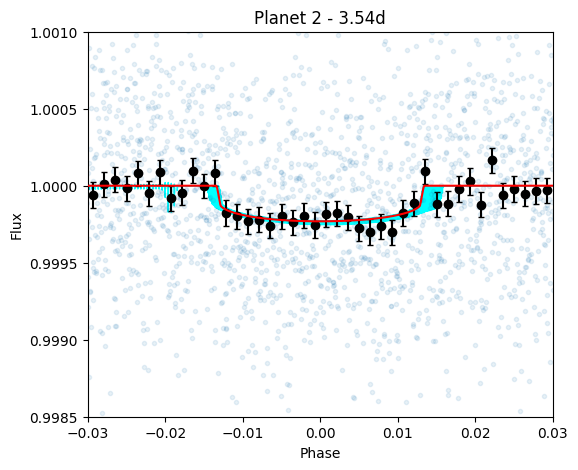

In [26]:
srt = np.argsort(lcdata["phase_2"])
subtract_signal = (lc_comp["pl_1"]-1)+(lc_comp["pl_3"]-1)
lc_pl2 = (lcdata["det_flux"]-subtract_signal)

plt.figure(figsize=(6,5))
plt.title(f"Planet 2 - {result.params_dict['Period_2']:.2f}d")

plt.plot(lcdata["phase_2"], lc_pl2,".",alpha=0.1)

ph_bin, f_bin, e_bin = bin_data(t = np.array(lcdata["phase_2"])[srt],
                                f = np.array(lc_pl2)[srt],
                               err=np.array(lcdata["error"])[srt],
                                bins=700)
plt.errorbar(ph_bin, f_bin, e_bin, fmt="ko",capsize=2)

plt.plot(np.array(lcdata["phase_2"])[srt], lc_comp["pl_2"][srt],"r",zorder=3)

plt.fill_between(np.array(lcdata["phase_2"])[srt],
                 (lcmod.sigma_low - subtract_signal)[srt], 
                 (lcmod.sigma_high - subtract_signal)[srt], color="cyan")


plt.ylim([0.9985,1.001])
plt.xlim([-0.03,0.03])
plt.ylabel("Flux")
plt.xlabel("Phase");

##### planet 3

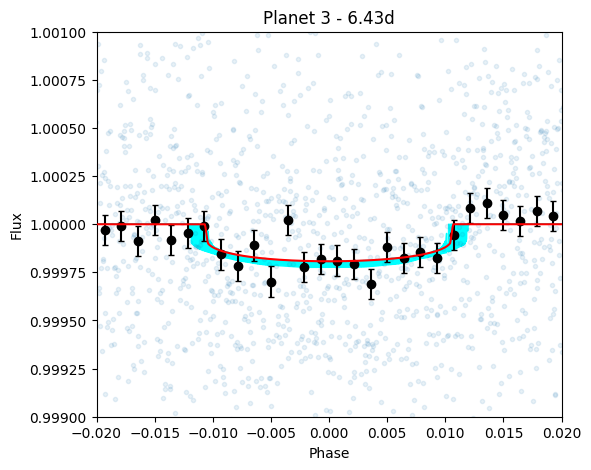

In [33]:
srt = np.argsort(lcdata["phase_3"])
subtract_signal = (lc_comp["pl_1"]-1)+(lc_comp["pl_2"]-1)
lc_pl3 = (lcdata["det_flux"]-subtract_signal)

plt.figure(figsize=(6,5))
plt.title(f"Planet 3 - {result.params_dict['Period_3']:.2f}d")

plt.plot(lcdata["phase_3"], lc_pl3,".",alpha=0.1)

ph_bin, f_bin, e_bin = bin_data(t = np.array(lcdata["phase_3"])[srt],
                                f = np.array(lc_pl3)[srt],
                                err=np.array(lcdata["error"])[srt],
                                bins=700)
plt.errorbar(ph_bin, f_bin, e_bin, fmt="ko",capsize=2)

plt.plot(np.array(lcdata["phase_3"])[srt], lc_comp["pl_3"][srt],"r",zorder=3)

plt.fill_between(np.array(lcdata["phase_3"])[srt],
                 (lcmod.sigma_low - subtract_signal)[srt], 
                 (lcmod.sigma_high - subtract_signal)[srt], color="cyan")


plt.ylim([0.999,1.001])
plt.xlim([-0.02,0.02])
plt.xlabel("Phase")
plt.ylabel("Flux");


## RVS

In [34]:
result.rv.names

['TOI469rv1.dat', 'TOI469rv2.dat']

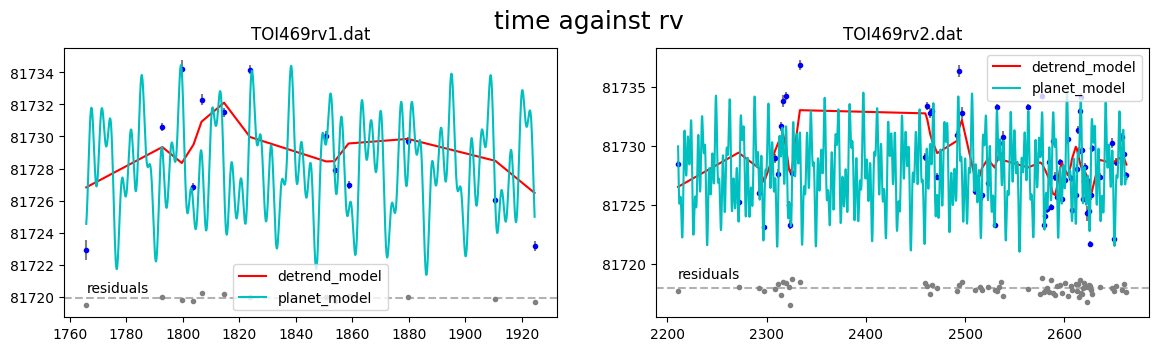

In [35]:
fig = result.rv.plot_bestfit()

In [36]:
#load output data files for the rv fits
rv1data = result.rv.outdata['TOI469rv1.dat']
rv2data = result.rv.outdata['TOI469rv2.dat']

In [37]:
#join two outputs in a single dataframe
rvdata = pd.concat([rv1data,rv2data])
rvdata

,time,RV,error,full_mod,gp+base,Rvmodel,det_RV,spl_fit,phase_1,phase_2,phase_3
0,1765.880033,81722.91,0.769538,81723.345544,81726.826511,-3.480966,-3.916510,0.0,0.371477,0.247115,-0.445902
1,1792.789313,81730.59,0.541284,81730.521301,81729.338598,1.182703,1.251402,0.0,0.345625,-0.147034,-0.260763
2,1799.679952,81734.23,0.715324,81734.371410,81728.347139,6.024271,5.882861,0.0,-0.148856,-0.199410,-0.189077
3,1803.799572,81726.85,0.536366,81727.011768,81729.486747,-2.474980,-2.636747,0.0,0.153372,-0.035008,0.451638
4,1806.664396,81732.28,0.579386,81731.936030,81730.923456,1.012575,1.356544,0.0,0.363544,-0.225271,-0.102803
...,...,...,...,...,...,...,...,...,...,...,...
65,2650.528840,81722.07,0.624461,81722.333305,81728.634470,-6.301165,-6.564470,0.0,0.272046,0.291214,0.141517
66,2652.549356,81728.62,0.582109,81728.420374,81728.758320,-0.337946,-0.138320,0.0,0.420277,-0.137691,0.455763
67,2658.552623,81730.69,0.637457,81730.822426,81729.104582,1.717844,1.585418,0.0,-0.139305,-0.440880,0.389438
68,2660.588322,81729.33,0.587836,81728.978940,81728.854264,0.124676,0.475736,0.0,0.010040,0.134506,-0.293954


In [38]:
# evaluate the RV model across both datasets
rvmod = result.rv.evaluate(file='TOI469rv1.dat', time=np.array(rvdata["time"]), 
                               return_std=True,nsamp=100)

since the RVs are sparsely sampled, we van evaluate the RV model on a smoother time array across both datasets

In [39]:
t_sm     = np.linspace(rvdata["time"].min(), rvdata["time"].max(), 1000)
rvmod_sm = result.rv.evaluate(file='TOI469rv1.dat',time=t_sm, return_std=True,nsamp=100)

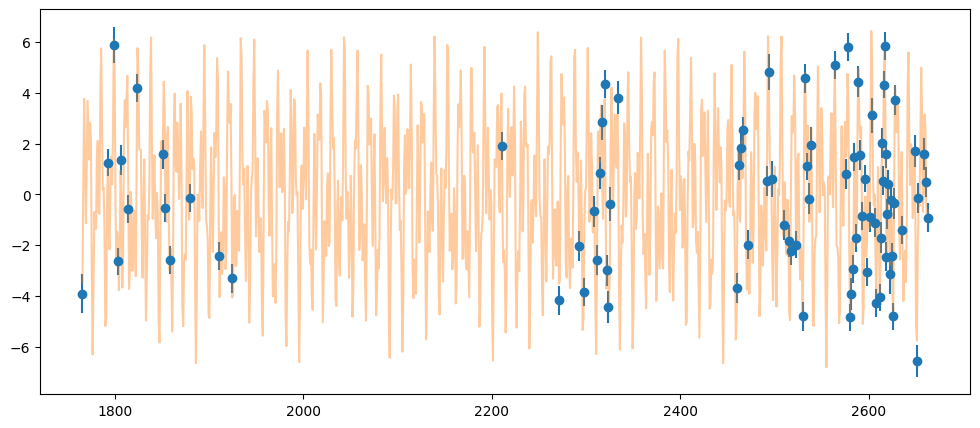

In [40]:
plt.figure(figsize=(12,5))
plt.errorbar(rvdata["time"],rvdata["det_RV"], rvdata["error"],fmt="o")
plt.plot(t_sm, rvmod_sm.planet_model, alpha=0.4)

### Individual components

In [41]:
rv_comp    = rvmod.components
rv_comp_sm = rvmod_sm.components

##### planet 1

Text(0, 0.5, 'RV [m/s]')

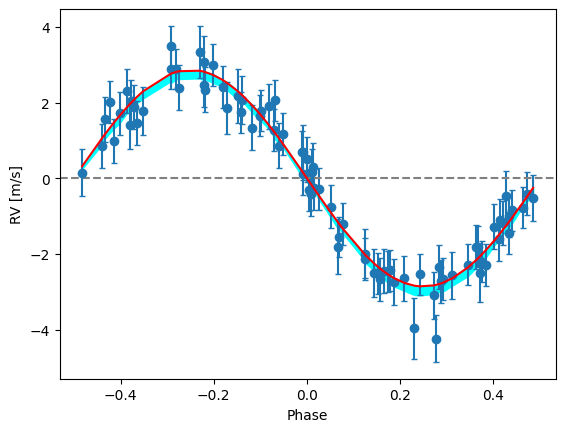

In [43]:
srt = np.argsort(rvdata["phase_1"])
subtract_signal = rv_comp["pl_2"]+rv_comp["pl_3"]

plt.errorbar(rvdata["phase_1"],(rvdata["det_RV"]-subtract_signal), rvdata["error"], fmt="o",capsize=2)
plt.plot(np.array(rvdata["phase_1"])[srt], rv_comp["pl_1"][srt],"r",zorder=4)

plt.fill_between(np.array(rvdata["phase_1"])[srt],(rvmod.sigma_low - subtract_signal)[srt], 
                 (rvmod.sigma_high-subtract_signal)[srt], color="cyan")


plt.axhline(0,ls="--",c="gray")
plt.xlabel("Phase")
plt.ylabel("RV [m/s]")

##### planet 2

Text(0, 0.5, 'RV [m/s]')

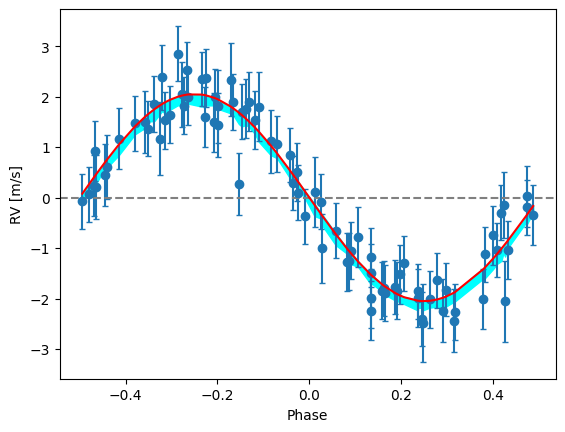

In [44]:
srt = np.argsort(rvdata["phase_2"])
subtract_signal = rv_comp["pl_1"]+rv_comp["pl_3"]

plt.errorbar(rvdata["phase_2"],(rvdata["det_RV"]-subtract_signal),
             rvdata["error"],fmt="o",capsize=2,label="RV2")
plt.plot(np.array(rvdata["phase_2"])[srt], rv_comp["pl_2"][srt],"r",zorder=4)

plt.fill_between(np.array(rvdata["phase_2"])[srt],(rvmod.sigma_low - subtract_signal)[srt], 
                 (rvmod.sigma_high-subtract_signal)[srt], color="cyan")


plt.axhline(0,ls="--",c="gray")
plt.xlabel("Phase")
plt.ylabel("RV [m/s]")

##### planet 3

Text(0, 0.5, 'RV [m/s]')

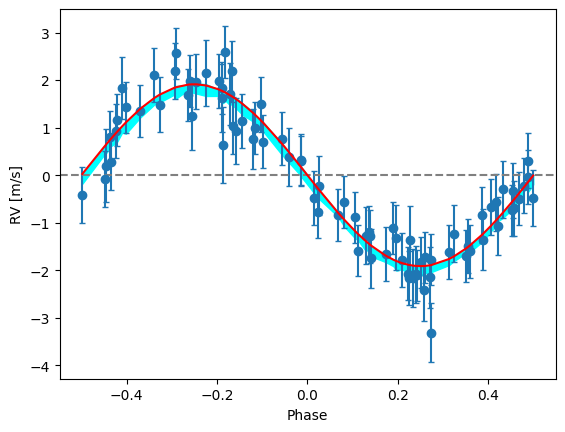

In [45]:
srt = np.argsort(rvdata["phase_3"])
subtract_signal = rv_comp["pl_1"]+rv_comp["pl_2"]

plt.errorbar(rvdata["phase_3"],(rvdata["det_RV"]-subtract_signal),
             rvdata["error"],fmt="o",capsize=2,label="RV3")
plt.plot(np.array(rvdata["phase_3"])[srt], rv_comp["pl_3"][srt],"r", zorder=4)

plt.fill_between(np.array(rvdata["phase_3"])[srt],(rvmod.sigma_low - subtract_signal)[srt], 
                 (rvmod.sigma_high-subtract_signal)[srt], color="cyan")


plt.axhline(0,ls="--",c="gray")
plt.xlabel("Phase")
plt.ylabel("RV [m/s]")